In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nasdaq = yf.download("^IXIC", start = "2010-01-01",end = "2023-06-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
nasdaq

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000
...,...,...,...,...,...,...
2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000
2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000
2023-05-26,12736.419922,13001.910156,12729.740234,12975.690430,12975.690430,4434070000


In [4]:
nasdaq_close = np.array(nasdaq.Close)
nasdaq_close

array([ 2308.41992188,  2308.70996094,  2301.09008789, ...,
       12975.69042969, 13017.4296875 , 12935.29003906])

In [5]:
nse = yf.download("^NSEI", start = "2010-01-01",end = "2023-06-01")

[*********************100%***********************]  1 of 1 completed


In [6]:
nse

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900
2023-05-26,18368.349609,18508.550781,18333.150391,18499.349609,18499.349609,198700
2023-05-29,18619.150391,18641.199219,18581.250000,18598.650391,18598.650391,265300


In [7]:
nse_close = np.array(nse.Close)
nse_close

array([ 5232.20019531,  5277.89990234,  5281.79980469, ...,
       18598.65039062, 18633.84960938, 18534.40039062])

In [8]:
comb = (pd.merge(nse,nasdaq ,on = 'Date',suffixes = ('_nse','_nasdaq'))).loc[:, ['Close_nse', 'Close_nasdaq']]

In [9]:
comb

,Close_nse,Close_nasdaq
Date,,
2010-01-04,5232.200195,2308.419922
2010-01-05,5277.899902,2308.709961
2010-01-06,5281.799805,2301.090088
2010-01-07,5263.100098,2300.050049
2010-01-08,5244.750000,2317.169922
...,...,...
2023-05-24,18285.400391,12484.160156
2023-05-25,18321.150391,12698.089844
2023-05-26,18499.349609,12975.690430


In [10]:
nse_array = comb['Close_nse'].to_numpy()
nasdaq_array = comb['Close_nasdaq'].to_numpy()

In [11]:
nse_array

array([ 5232.20019531,  5277.89990234,  5281.79980469, ...,
       18499.34960938, 18633.84960938, 18534.40039062])

In [12]:
corcof = np.corrcoef(nse_array,nasdaq_array) #corcof = correlation coefficient

In [13]:
corcof  #values at (1,2) and (2,1) gives correlation coefficient between nse and nasdaq

array([[1.       , 0.9511577],
       [0.9511577, 1.       ]])

### Correlation Coefficient between nse and nasdaq is 0.95131388
### Hence Correlation Coefficient close to +1 shows that there is a direct and strong relationship


<function matplotlib.pyplot.legend(*args, **kwargs)>

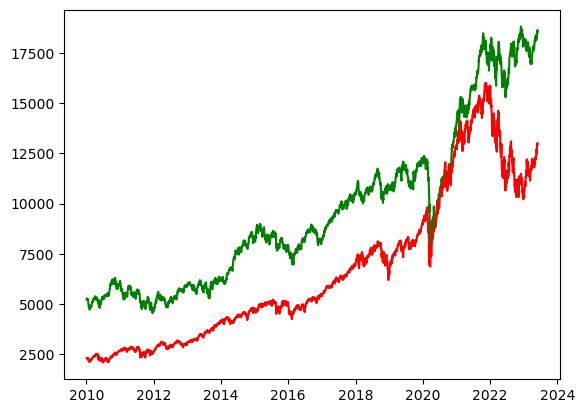

In [14]:
plt.plot(comb.index, comb['Close_nse'], color='g', label='nse')
plt.plot(comb.index, comb['Close_nasdaq'], color='r', label='nasdaq')
plt.legend

In [15]:
nse_prices = nse['Close']
nasdaq_prices = nasdaq['Close']

In [16]:
nse_returns = comb['Close_nse']
nasdaq_returns = comb['Close_nasdaq']

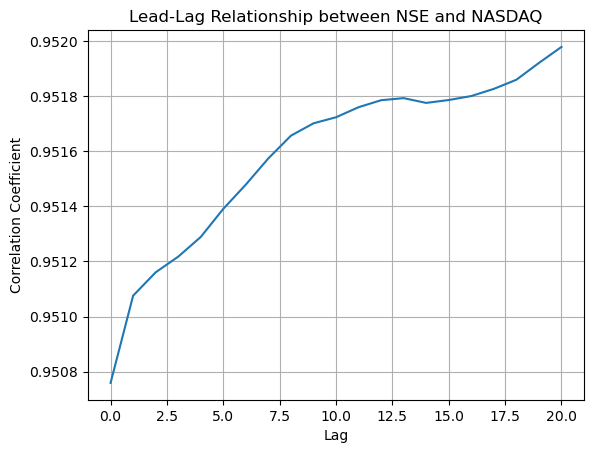

In [17]:
max_lag = 20
lead_lag_correlation = []
for lag in range(-max_lag, max_lag+1):
    shifted_nasdaq_returns = nasdaq_returns.shift(lag)
    correlation_coefficient = np.corrcoef(shifted_nasdaq_returns[max_lag:], nse_returns[max_lag:])[0, 1]
    lead_lag_correlation.append(correlation_coefficient)

lags = range(-max_lag, max_lag+1)
plt.plot(lags, lead_lag_correlation)
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.title('Lead-Lag Relationship between NSE and NASDAQ')
plt.grid(True)
plt.show()

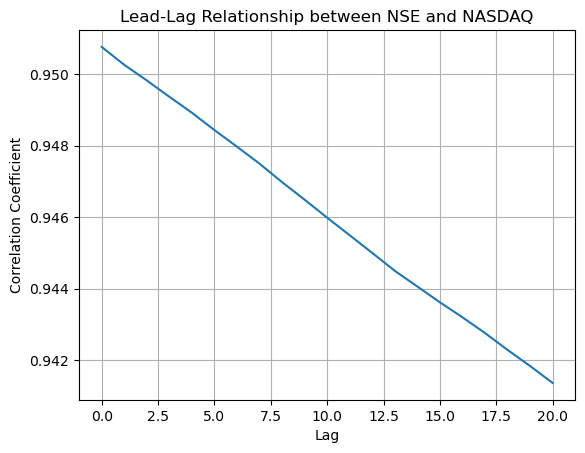

In [18]:
max_lag = 20

lead_lag_correlation = []
for lag in range(-max_lag, max_lag+1):
    shifted_nse_returns = nse_returns.shift(lag)
    correlation_coefficient = np.corrcoef(shifted_nse_returns[max_lag:], nasdaq_returns[max_lag:])[0, 1]
    lead_lag_correlation.append(correlation_coefficient)

lags = range(-max_lag, max_lag+1)
plt.plot(lags, lead_lag_correlation)
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.title('Lead-Lag Relationship between NSE and NASDAQ')
plt.grid(True)
plt.show()

### When we shift NASDAQ over NSE, we get increasing correlation coefficient which means as the lag increase the NSE follows NASDAQ, whereas when NSE is shifted over NASDAQ slope decreases which again means NASDAQ is leading NSE.

### Hence we choose NASDAQ for parameter optimistaion and NSE for trading purpose

### NSE Keltner Channel

In [25]:
import talib
nse_kc = nse.copy() #nse_kc for Keltner Channel of NSE

In [26]:
nse_kc['ATR'] = talib.ATR(nse_kc['High'], nse_kc['Low'], nse_kc['Close'], timeperiod=14)
nse_kc['middle_band'] = talib.EMA(nse_kc['Close'], timeperiod=20)
nse_kc['upper_band'] = nse_kc['middle_band'] + 2 * nse_kc['ATR']
nse_kc['lower_band'] = nse_kc['middle_band'] - 2 * nse_kc['ATR']

In [27]:
nse_kc

,Open,High,Low,Close,Adj Close,Volume,ATR,middle_band,upper_band,lower_band
Date,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,NaN,NaN,NaN,NaN
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,NaN,NaN,NaN,NaN
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,NaN,NaN,NaN,NaN
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,NaN,NaN,NaN,NaN
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900,152.047654,18167.786993,18471.882302,17863.691685
2023-05-26,18368.349609,18508.550781,18333.150391,18499.349609,18499.349609,198700,154.572850,18199.364385,18508.510085,17890.218686
2023-05-29,18619.150391,18641.199219,18581.250000,18598.650391,18598.650391,265300,153.664047,18237.391624,18544.719718,17930.063530


Text(0.5, 1.0, 'NSE Keltner Channel')

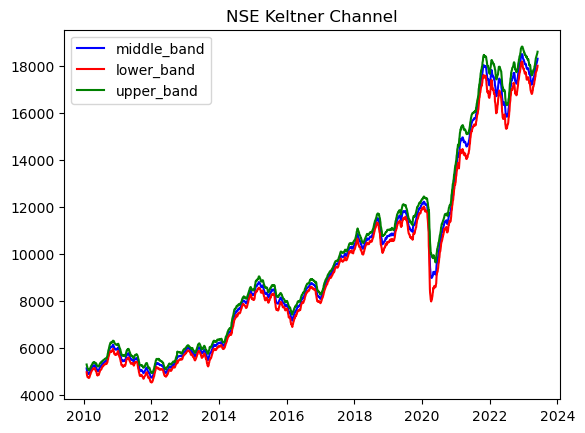

In [28]:
plt.plot(nse_kc.index , nse_kc['middle_band'], color = 'b',label = 'middle_band')
plt.plot(nse_kc.index , nse_kc['lower_band'], color = 'r',label = 'lower_band')
plt.plot(nse_kc.index , nse_kc['upper_band'], color = 'g',label = 'upper_band')
plt.legend()
plt.title('NSE Keltner Channel')

# NASDAQ Keltner Channel

In [29]:
nasdaq_kc = nasdaq.copy() #nasdaq_kc for Keltner Channel of NASDAQ

In [30]:
nasdaq_kc['ATR'] = talib.ATR(nasdaq_kc['High'], nasdaq_kc['Low'], nasdaq_kc['Close'], timeperiod=14)
nasdaq_kc['middle_band'] = talib.SMA(nasdaq_kc['Close'], timeperiod=2)
nasdaq_kc['upper_band'] = nasdaq_kc['middle_band'] #+ 500 * nasdaq_kc['ATR']
nasdaq_kc['lower_band'] = nasdaq_kc['middle_band'] #- 500 * nasdaq_kc['ATR']

In [31]:
nasdaq_kc

,Open,High,Low,Close,Adj Close,Volume,ATR,middle_band,upper_band,lower_band
Date,,,,,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,NaN,NaN,NaN,NaN
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,NaN,2308.564941,2308.564941,2308.564941
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,NaN,2304.900024,2304.900024,2304.900024
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,NaN,2300.570068,2300.570068,2300.570068
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,NaN,2308.609985,2308.609985,2308.609985
...,...,...,...,...,...,...,...,...,...,...
2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000,150.784286,12522.205078,12522.205078,12522.205078
2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000,158.068249,12591.125000,12591.125000,12591.125000
2023-05-26,12736.419922,13001.910156,12729.740234,12975.690430,12975.690430,4434070000,168.479111,12836.890137,12836.890137,12836.890137


Text(0.5, 1.0, 'NASDAQ Keltner Channel')

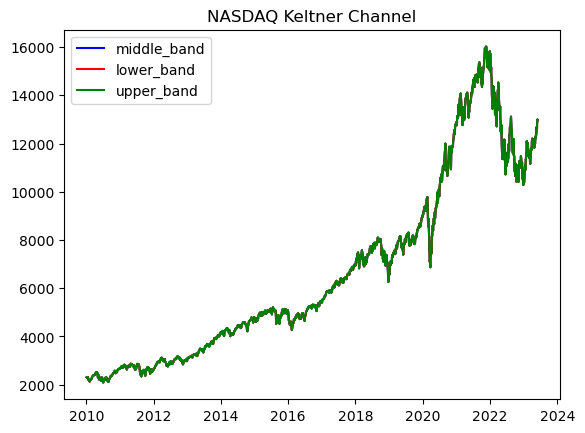

In [32]:
plt.plot(nasdaq_kc.index , nasdaq_kc['middle_band'], color = 'b',label = 'middle_band')
plt.plot(nasdaq_kc.index , nasdaq_kc['lower_band'], color = 'r',label = 'lower_band')
plt.plot(nasdaq_kc.index , nasdaq_kc['upper_band'], color = 'g',label = 'upper_band')
plt.legend()
plt.title('NASDAQ Keltner Channel')

# NSE Bollinger Bands

In [33]:
nse_bb = nse.copy() #nse_bb for Bollinger Bands of NSE

In [34]:
nse_bb['middle_band'] = talib.SMA(nse_bb['Close'], timeperiod=20)
std_dev = talib.STDDEV(nse_bb['Close'], timeperiod=20)
nse_bb['upper_band'] = nse_bb['middle_band'] + 2 * std_dev
nse_bb['lower_band'] = nse_bb['middle_band'] - 2 * std_dev

In [35]:
nse_bb

,Open,High,Low,Close,Adj Close,Volume,middle_band,upper_band,lower_band
Date,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,NaN,NaN,NaN
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,NaN,NaN,NaN
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,NaN,NaN,NaN
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,NaN,NaN,NaN
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900,18223.450098,18458.882181,17988.018014
2023-05-26,18368.349609,18508.550781,18333.150391,18499.349609,18499.349609,198700,18252.665039,18472.247131,18033.082947
2023-05-29,18619.150391,18641.199219,18581.250000,18598.650391,18598.650391,265300,18279.347559,18528.879134,18029.815983


Text(0.5, 1.0, 'NSE Bollinger Bands')

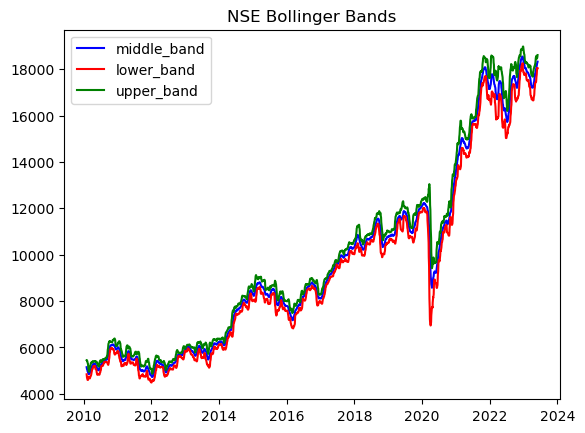

In [36]:
plt.plot(nse_bb.index, nse_bb['middle_band'], color='b', label = 'middle_band')
plt.plot(nse_bb.index, nse_bb['lower_band'], color='r',label = 'lower_band')
plt.plot(nse_bb.index, nse_bb['upper_band'], color='g',label = 'upper_band')
plt.legend()
plt.title('NSE Bollinger Bands')

# NASDAQ Bollinger Bands

In [37]:
nasdaq_bb = nasdaq.copy()

In [38]:
tp = 2
nasdaq_bb['middle_band'] = talib.SMA(nasdaq_bb['Close'], timeperiod=tp)
std_dev = talib.STDDEV(nasdaq_bb['Close'], timeperiod=tp)
nasdaq_bb['upper_band'] = nasdaq_bb['middle_band'] + 2 * std_dev
nasdaq_bb['lower_band'] = nasdaq_bb['middle_band'] - 2 * std_dev

In [39]:
nasdaq_bb#.drop(['Cumulative Returns','Portfolio','Returns','Strategy Returns'],axis = 1)

,Open,High,Low,Close,Adj Close,Volume,middle_band,upper_band,lower_band
Date,,,,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,NaN,NaN,NaN
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,2308.564941,2308.854980,2308.274902
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,2304.900024,2312.519897,2297.280151
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,2300.570068,2301.610107,2299.530029
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,2308.609985,2325.729858,2291.490112
...,...,...,...,...,...,...,...,...,...
2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000,12522.205078,12598.294922,12446.115234
2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000,12591.125000,12805.054688,12377.195312
2023-05-26,12736.419922,13001.910156,12729.740234,12975.690430,12975.690430,4434070000,12836.890137,13114.490723,12559.289551


In [40]:
nasdaq_bb.Returns.sum()

AttributeError: 'DataFrame' object has no attribute 'Returns'

Text(0.5, 1.0, 'Nasdaq Bollinger Bands')

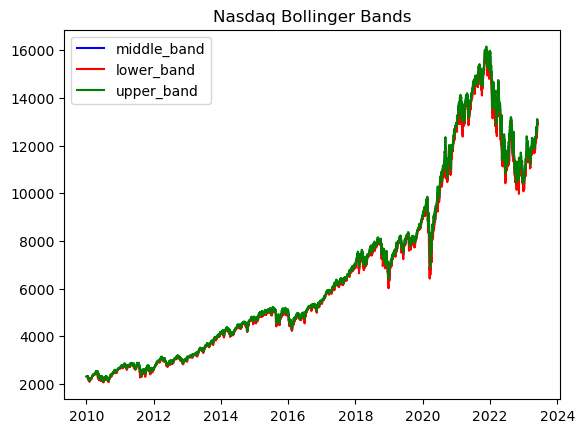

In [41]:
plt.plot(nasdaq_bb.index, nasdaq_bb['middle_band'], color='b',label = 'middle_band')
plt.plot(nasdaq_bb.index, nasdaq_bb['lower_band'], color='r',label = 'lower_band')
plt.plot(nasdaq_bb.index, nasdaq_bb['upper_band'], color='g',label = 'upper_band')
plt.legend()
plt.title('Nasdaq Bollinger Bands')

# NSE MACD Line

In [42]:
nasdaq_macd = nasdaq.copy()

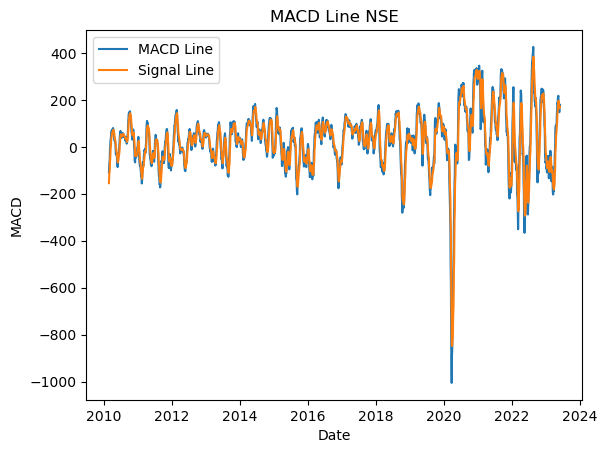

In [43]:
macd_nse, signal_nse, _ = talib.MACD(nse['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
plt.plot(nse.index, macd_nse, label='MACD Line')
plt.plot(nse.index, signal_nse, label='Signal Line')
plt.title('MACD Line NSE')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

# NASDAQ MACD Line

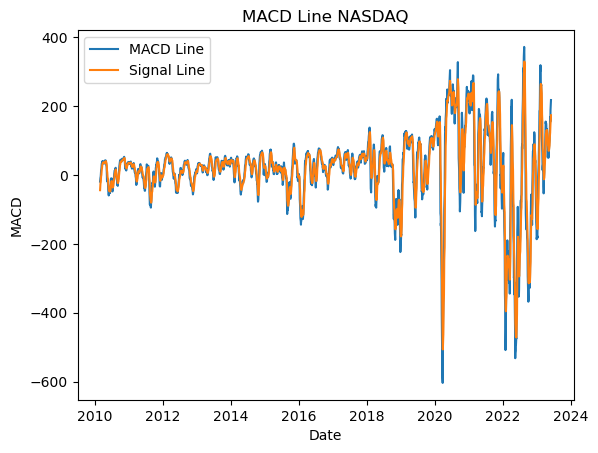

In [44]:
macd_nasdaq, signal_nasdaq, _ = talib.MACD(nasdaq['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
plt.plot(nasdaq.index, macd_nasdaq, label='MACD Line')
plt.plot(nasdaq.index, signal_nasdaq, label='Signal Line')
plt.title('MACD Line NASDAQ')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

In [45]:
nasdaq_macd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000
...,...,...,...,...,...,...
2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000
2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000
2023-05-26,12736.419922,13001.910156,12729.740234,12975.690430,12975.690430,4434070000


# Optimizing parameters

# Keltner channel optimisation

In [46]:
# def simulate_trades(data, upper_band, middle_band,lower_band):
#     positions = np.zeros(len(data))
#     portfolio = np.zeros(len(data))
#     position = 0

#     for i in range(1, len(data)):
#         if data['Close'].iloc[i] > upper_band.iloc[i] and data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1]:
#             positions[i] = 1
#             position = 1
# #         elif data['Close'].iloc[i] == middle_band.iloc[i] :
# #             if positions[i-1] == -1 :
# #                 positions[i] = 1
# #                 position = 1
# #             if positions[i-1] == 1 :
# #                 positions[i] = -1
# #                 position = -1
#         elif data['Close'].iloc[i] < lower_band.iloc[i] and data['Close'].iloc[i - 1] >=lower_band.iloc[i - 1]:
#             positions[i] = -1
#             position = -1
            
#         else:
#             positions[i] = 0

#     portfolio[0] = data['Close'].iloc[0]
#     for i in range(1, len(data)):
#         if positions[i] == 0:
#             portfolio[i] = portfolio[i - 1]
#         elif positions[i] == 1:
#             portfolio[i] = portfolio[i - 1] * (data['Close'].iloc[i] / data['Close'].iloc[i - 1])
#         elif positions[i] == -1:
#             portfolio[i] = portfolio[i - 1] / (data['Close'].iloc[i] / data['Close'].iloc[i - 1])

#     data['Position'] = positions
#     data['Portfolio'] = portfolio
#     data['Returns'] = data['Portfolio'] - data['Portfolio'].shift(1)
#     return data




def simulate_trades(data, upper_band, middle_band,lower_band):
    positions = np.zeros(len(data))
    portfolio = np.zeros(len(data))
    position = 0

    for i in range(1, len(data)):
        if data['Close'].iloc[i] > upper_band.iloc[i] and data['Close'].iloc[i - 1] <= upper_band.iloc[i - 1]:
            positions[i] = 1
            position = 1
        elif data['Close'].iloc[i] < middle_band.iloc[i] and data['Close'].iloc[i - 1] >=middle_band.iloc[i - 1]:
            positions[i] = -1
            position = -1
        elif data['Close'].iloc[i] < lower_band.iloc[i] and data['Close'].iloc[i - 1] >= upper_band.iloc[i - 1]:
            positions[i] = -1
            position = -1
        elif data['Close'].iloc[i] > middle_band.iloc[i] and data['Close'].iloc[i - 1] <=middle_band.iloc[i - 1]:
            positions[i] = 1
            position = 1
            
        else:
            positions[i] = 0

    portfolio[0] = data['Close'].iloc[0]
    for i in range(1, len(data)):
        if positions[i] == 0:
            portfolio[i] = portfolio[i - 1]
        elif positions[i] == 1:
            portfolio[i] = portfolio[i - 1] * (data['Close'].iloc[i] / data['Close'].iloc[i - 1])
        elif positions[i] == -1:
            portfolio[i] = portfolio[i - 1] / (data['Close'].iloc[i] / data['Close'].iloc[i - 1])

    data['Position'] = positions
    data['Portfolio'] = portfolio
    data['Returns'] = data['Portfolio'] - data['Portfolio'].shift(1)
    return data


simulate_trades(nasdaq_kc , nasdaq_kc.upper_band, nasdaq_kc.middle_band,nasdaq_kc.lower_band)

,Open,High,Low,Close,Adj Close,Volume,ATR,middle_band,upper_band,lower_band,Position,Portfolio,Returns
Date,,,,,,,,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,NaN,NaN,NaN,NaN,0.0,2.308420e+03,NaN
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,NaN,2308.564941,2308.564941,2308.564941,0.0,2.308420e+03,0.000000e+00
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,NaN,2304.900024,2304.900024,2304.900024,-1.0,2.316064e+03,7.644145e+00
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,NaN,2300.570068,2300.570068,2300.570068,0.0,2.316064e+03,0.000000e+00
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,NaN,2308.609985,2308.609985,2308.609985,1.0,2.333303e+03,1.723907e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000,150.784286,12522.205078,12522.205078,12522.205078,0.0,1.340714e+10,0.000000e+00
2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000,158.068249,12591.125000,12591.125000,12591.125000,1.0,1.363688e+10,2.297459e+08
2023-05-26,12736.419922,13001.910156,12729.740234,12975.690430,12975.690430,4434070000,168.479111,12836.890137,12836.890137,12836.890137,0.0,1.363688e+10,0.000000e+00


In [47]:
nasdaq_kc.Returns.sum()

13723476489.334505

# Bollinger Band optimisation


In [48]:
nasdaq_bb['signal'] = 0

for i in range(1, len(nasdaq_bb)):
    if nasdaq_bb['Close'][i] < nasdaq_bb['lower_band'][i] and nasdaq_bb['Close'][i-1] > nasdaq_bb['lower_band'][i-1]:
        nasdaq_bb['signal'][i] = 1  # Buy signal
    elif nasdaq_bb['Close'][i] > nasdaq_bb['upper_band'][i] and nasdaq_bb['Close'][i-1] < nasdaq_bb['upper_band'][i-1]:
        nasdaq_bb['signal'][i] = -1  # Sell signal

# Execute trades based on signals
nasdaq_bb['position'] = nasdaq_bb['signal'].diff()
nasdaq_bb['position'].fillna(0, inplace=True)

# Calculate portfolio value
initial_capital = 100000.0
nasdaq_bb['holdings'] = nasdaq_bb['position'].cumsum() * nasdaq_bb['Close']
nasdaq_bb['cash'] = initial_capital - (nasdaq_bb['position'] * nasdaq_bb['Close']).cumsum()
nasdaq_bb['total'] = nasdaq_bb['cash'] + nasdaq_bb['holdings']

# Print final portfolio value
final_portfolio_value = nasdaq_bb['total'].iloc[-1]
print('Final Portfolio Value:', final_portfolio_value)

Final Portfolio Value: 100000.0


In [49]:
nasdaq_bb

,Open,High,Low,Close,Adj Close,Volume,middle_band,upper_band,lower_band,signal,position,holdings,cash,total
Date,,,,,,,,,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,NaN,NaN,NaN,0,0.0,0.0,100000.0,100000.0
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,2308.564941,2308.854980,2308.274902,0,0.0,0.0,100000.0,100000.0
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,2304.900024,2312.519897,2297.280151,0,0.0,0.0,100000.0,100000.0
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,2300.570068,2301.610107,2299.530029,0,0.0,0.0,100000.0,100000.0
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,2308.609985,2325.729858,2291.490112,0,0.0,0.0,100000.0,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000,12522.205078,12598.294922,12446.115234,0,0.0,0.0,100000.0,100000.0
2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000,12591.125000,12805.054688,12377.195312,0,0.0,0.0,100000.0,100000.0
2023-05-26,12736.419922,13001.910156,12729.740234,12975.690430,12975.690430,4434070000,12836.890137,13114.490723,12559.289551,0,0.0,0.0,100000.0,100000.0


# MACD Optimisation

In [50]:
macd_nasdaq['signal'] = 0
macd, macd_signal, _ = talib.MACD(nasdaq_macd['Close'])

for i in range(1, len(macd_nasdaq)):
    if macd_nasdaq[i] > macd_signal[i] and macd_nasdaq[i-1] <= macd_signal[i-1]:
        nasdaq_macd['signal'][i] = 1  # Buy signal
    elif macd_nasdaq[i] < macd_signal[i] and macd_nasdaq[i-1] >= macd_signal[i-1]:
        nasdaq_macd['signal'][i] = -1  # Sell signal

# Execute trades based on signals
macd_nasdaq['position'] = macd_nasdaq['signal'].diff()
macd_nasdaq['position'].fillna(0, inplace=True)

# Calculate portfolio value
initial_capital = 100000.0
macd_nasdaq['holdings'] = macd_nasdaq['position'].cumsum() * macd_nasdaq['Close']
macd_nasdaq['cash'] = initial_capital - (macd_nasdaq['position'] * macd_nasdaq['Close']).cumsum()
macd_nasdaq['total'] = macd_nasdaq['cash'] + macd_nasdaq['holdings']

# Print final portfolio value
final_portfolio_value = macd_nasdaq['total'].iloc[-1]
print('Final Portfolio Value:', final_portfolio_value)

KeyError: 'signal'